## Clasificación de elementos de notación musical
Podemos definir la notación musical como un sistema gráfico de representar el sonido en todos sus grados musicales, las modificaciones de tiempo, intensidad, articulación y matices que le afectan así como las pautas rítmicas y silencios que limitan su intervención.

### Proyecto Redes Neuronales
El proyecto consiste en obtener distintas imágenes de diversas fuentes para entrenar un modelo predictivo que clasifique imágenes según el símbolo de la notación musical que representan.

### ¿Para qué puede usarse?
En el mercado existen muy pocos, por no decir uno o dos, software de transcripción de partituras hechas a mano para el ordenador. Con un modelo de precisión alta, podría intentarse desarrollar dicho software.

![image.png](https://apacha.github.io/OMR-Datasets/samples/universal-music-symbol-collection.png)

### Fuente de obtención de datos
https://apacha.github.io/OMR-Datasets/

# Proyecto Musical CNN

In [129]:
# Importación de las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import tensorflow as tf
import keras
from keras.utils import plot_model
from time import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

## Lectura de archivos csv

In [ ]:
all_files = glob.glob("*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=',', error_bad_lines=False, header=None)
    li.append(df)

# Transformando nombre de la última columna 
frame = pd.concat(li, axis=0, ignore_index=True)
frame.rename(columns={ df.columns[576]: "Clase" }, inplace = True)

## Viendo las categorías más populares
Dentro del dataset se encuentran 79 símbolos. Se hizo primero un filtro a nivel de imágenes, antes de realizar los CSV, pero para fines de no sobrecargar la NN, se usarán los primeros 11.

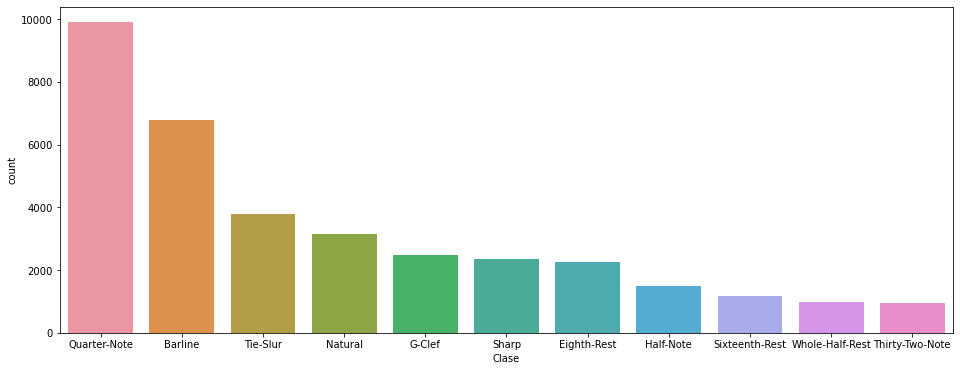

In [32]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Clase", data=frame, order=frame.Clase.value_counts().iloc[:11].index)

In [38]:
filtro = frame.Clase.value_counts().iloc[:11].index.tolist()
filtro

['Quarter-Note',
 'Barline',
 'Tie-Slur',
 'Natural',
 'G-Clef',
 'Sharp',
 'Eighth-Rest',
 'Half-Note',
 'Sixteenth-Rest',
 'Whole-Half-Rest',
 'Thirty-Two-Note']

In [44]:
datos = frame[frame['Clase'].isin(filtro)]
datos.head(10)

,0,1,2,3,4,5,6,7,8,9,...,567,568,569,570,571,572,573,574,575,Clase
1061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline


In [45]:
datos = datos.to_numpy()
datos

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Barline'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Barline'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Barline'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Whole-Half-Rest'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Whole-Half-Rest'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Whole-Half-Rest']], dtype=object)

#### Mostrando un objeto
Se graficará un objeto de ejemplo. Todas las imágenes están a blanco y negro.

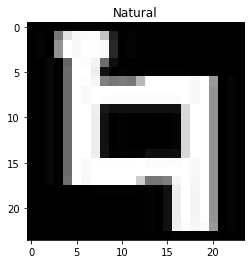

In [71]:
plt.imshow(np.resize(datos[15032][0:575].astype(float),(24,24)), cmap="gray")
plt.title(datos[15032][576])
plt.show()

In [ ]:
# Convirtiendo los datos a float
datos[::, 0::575] = datos[::,0::575].astype(float)

#### Codificando las categorías
Se codificarán las categorías de texto a número para el modelo predictivo.

In [84]:
# Label encoder para las categorías
le = preprocessing.LabelEncoder()
le.fit(datos[::,576])
le.classes_

array(['Barline', 'Eighth-Rest', 'G-Clef', 'Half-Note', 'Natural',
       'Quarter-Note', 'Sharp', 'Sixteenth-Rest', 'Thirty-Two-Note',
       'Tie-Slur', 'Whole-Half-Rest'], dtype=object)

In [85]:
# Transformando los datos a forma numérica
datos[::,576] = le.transform(datos[::,576])

In [87]:
# Convirtiendo los datos a flotante
datos.astype(float)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 10.],
       [ 0.,  0.,  0., ...,  0.,  0., 10.],
       [ 0.,  0.,  0., ...,  0.,  0., 10.]])

### Partiendo el modelo en parte de entrenamiento y validación

In [92]:
from sklearn.model_selection import train_test_split
# Haciendo el splitting entre training set y test set
train, test = train_test_split(datos, test_size=0.30) # Usé la librería de sklearn para hacerlo de manera más simple

In [97]:
# Segmentando el dataset en X y Y
x_train = train[::,:576].astype(float)
y_train = train[::, 576].astype(float)
x_test = train[::,:576].astype(float)
y_test = train[::, 576].astype(float)

# Re-escalando las imágenes
x_train = x_train / 255
x_test = x_test / 255

##### El tamaño no tiene las dimensiones para CNN

In [103]:
# Tamaño del input antes de prepararlo
x_train[100].shape

(576,)

In [111]:
# Preparándolo con tamaño (24, 24, 1)
x_train = x_train.reshape(x_train.shape[0], 24, 24, 1)

In [112]:
# Tamaño del input
x_train[100].shape

(24, 24, 1)

## Modelo Predictivo
Se usará Keras para construir la CNN. Tendrá dos capas convolucionales y dos capas de neuronas.

In [100]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [115]:
cnn_model = Sequential(name='Simple CNN')

#convlolutional layers
cnn_model.add(Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# dense layers
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(11, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(cnn_model.summary())

Model: "Simple CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 24)        240       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 48)          10416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               3

In [116]:
hitorial_del_modelo = cnn_model.fit(x_train, y_train,
                          batch_size = 128,
                          epochs = 20,
                          validation_split = 0.2,
                          shuffle=True, verbose=1)

Train on 19758 samples, validate on 4940 samples
Epoch 1/20
19758/19758 [==============================] - 11s 554us/step - loss: 1.8886 - accuracy: 0.3893 - val_loss: 1.5115 - val_accuracy: 0.5241
Epoch 2/20
19758/19758 [==============================] - 11s 557us/step - loss: 1.1913 - accuracy: 0.6291 - val_loss: 1.0359 - val_accuracy: 0.6538
Epoch 3/20
19758/19758 [==============================] - 11s 541us/step - loss: 0.8782 - accuracy: 0.7235 - val_loss: 0.8858 - val_accuracy: 0.7071
Epoch 4/20
19758/19758 [==============================] - 11s 543us/step - loss: 0.7116 - accuracy: 0.7750 - val_loss: 0.6248 - val_accuracy: 0.8022
Epoch 5/20
19758/19758 [==============================] - 11s 541us/step - loss: 0.6361 - accuracy: 0.7999 - val_loss: 0.5499 - val_accuracy: 0.8403
Epoch 6/20
19758/19758 [==============================] - 11s 536us/step - loss: 0.5580 - accuracy: 0.8262 - val_loss: 0.5204 - val_accuracy: 0.8385
Epoch 7/20
19758/19758 [==============================] -

# Obteniendo los resultados del modelo durante el entrenamiento
Ver el desempeño del modelo durante el entrenamiento.

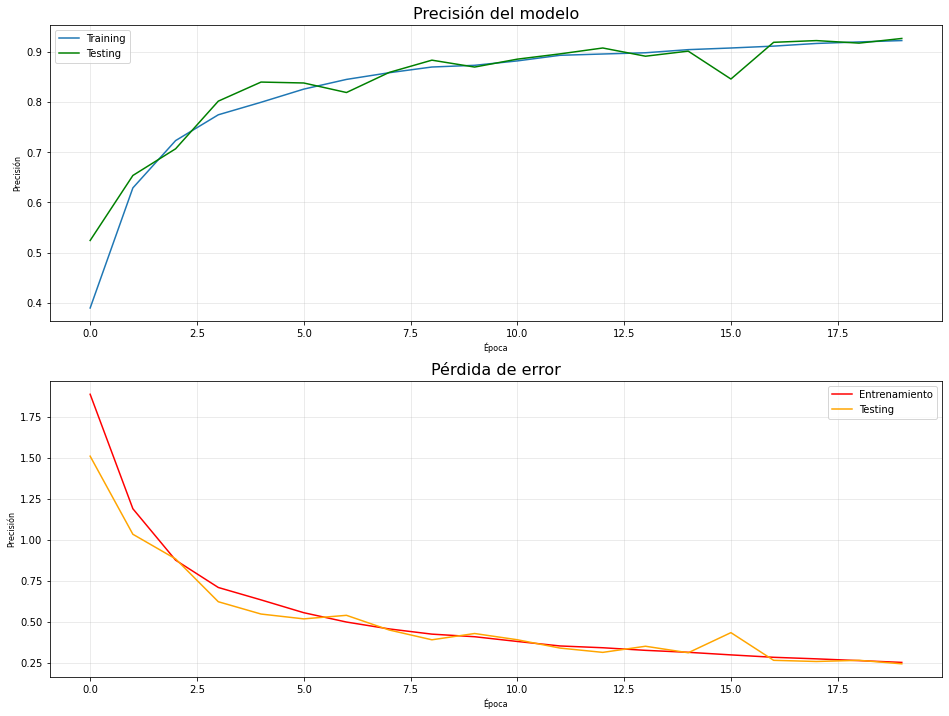

In [128]:
def plot_hist(model_history):
    fix,axs=plt.subplots(2,1,figsize=(16,12))
    ax1 = axs[0]
    ax1.plot(model_history.history['accuracy'])
    ax1.plot(model_history.history['val_accuracy'],c='g')
    ax1.set_title('Precisión del modelo',fontsize=16)
    ax1.set_ylabel('Precisión',fontsize=8)
    ax1.set_xlabel('Época',fontsize=8)
    ax1.grid(alpha=0.3)
    ax1.legend(['Training', 'Testing'], loc='upper left')


    # # summarize history for loss
    ax2 = axs[1]
    ax2.plot(model_history.history['loss'],c='r')
    ax2.plot(model_history.history['val_loss'],c='orange')
    ax2.set_title('Pérdida de error',fontsize=16)
    ax2.set_ylabel('Precisión',fontsize=8)
    ax2.set_xlabel('Época',fontsize=8)
    ax2.grid(alpha=0.3)
    ax2.legend(['Entrenamiento', 'Testing'], loc='upper right')
    plt.show()


plot_hist(hitorial_del_modelo)

### Probando el modelo

In [124]:
# Preparándolo con tamaño (24, 24, 1)
x_test = x_test.reshape(x_test.shape[0], 24, 24, 1)

In [125]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)

print('\nTest accuracy:', test_acc)
print('Test loss:    ', test_loss)

24698/24698 [==============================] - ETA:  - 7s 298us/step

Test accuracy: 0.9334763884544373
Test loss:     0.22832570206840005


### Graficando el modelo

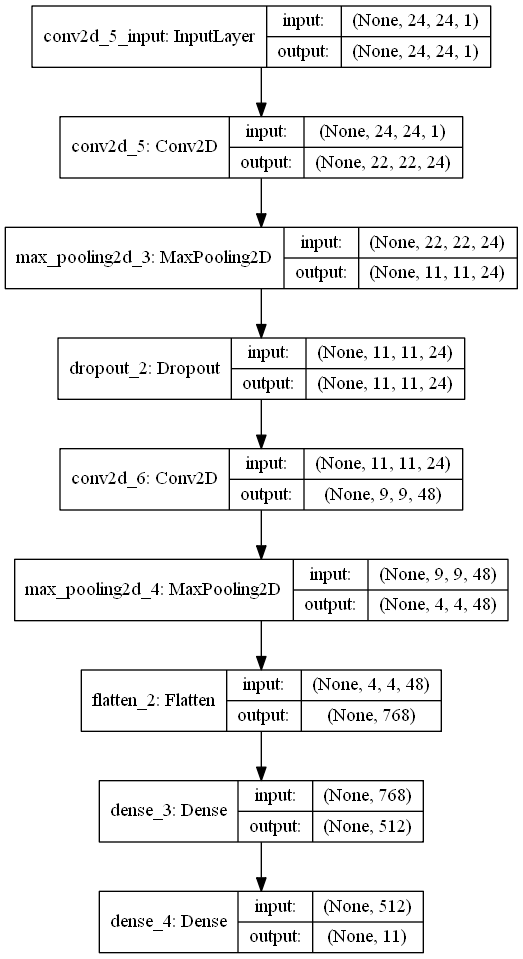

In [130]:
plot_model(cnn_model, to_file='model.png', show_shapes=True, show_layer_names=True)